# IMPORTING PYTHON PACKAGES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

C:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# IMPORTING DATASET

In [2]:
df_sli=pd.read_csv('SBI_LIFE_INSURANCE.csv')
df_sli

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


# EXPLORATORY DATA ANALYSIS 

In [3]:
df_sli.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
df_sli.tail()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
1333,50,1,30.97,3,0,1,10600.5483,0
1334,18,0,31.92,0,0,0,2205.9808,1
1335,18,0,36.85,0,0,2,1629.8335,1
1336,21,0,25.80,0,0,3,2007.9450,0
1337,61,0,29.07,0,1,1,29141.3603,1


In [5]:
df_sli.shape

(1338, 8)

In [6]:
df_sli.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [7]:
df_sli.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [8]:
df_sli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [9]:
df_sli.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


Data in the column 'charges' does not appear to have normal distribution. Data in all other columns appear to have normal distribution (mean very close to 50th percentile).

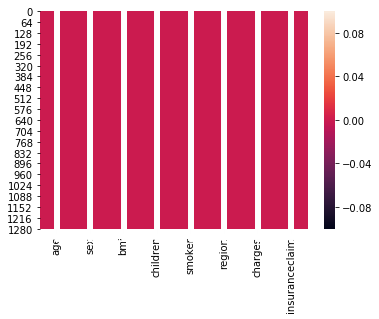

In [10]:
sns.heatmap(df_sli.isnull(),annot=True)

In [11]:
df_sli.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

CHECKING DATA SKEWNESS

In [12]:
df_sli.skew()

age               0.055673
sex              -0.020951
bmi               0.284047
children          0.938380
smoker            1.464766
region           -0.038101
charges           1.515880
insuranceclaim   -0.346254
dtype: float64

REMOVING DATA SKEWNESS

In [13]:
for col in df_sli.columns:
    if df_sli.skew().loc[col]>0.55:
        df_sli[col]=np.log1p(df_sli[col])
df_sli.skew()

age               0.055673
sex              -0.020951
bmi               0.284047
children          0.264083
smoker            1.464766
region           -0.038101
charges          -0.089817
insuranceclaim   -0.346254
dtype: float64

CHECKING OUTLIERS

In [14]:
z=np.abs(zscore(df_sli))
print(z.shape)
print(np.where(z>3))

(1338, 8)
(array([ 116,  847, 1047, 1317], dtype=int64), array([2, 2, 2, 2], dtype=int64))


In [15]:
print(df_sli.iloc[116,])
print()
print(df_sli.iloc[847,])
print()
print(df_sli.iloc[1047,])
print()
print(df_sli.iloc[1317,])

age               58.000000
sex                1.000000
bmi               49.060000
children           0.000000
smoker             0.000000
region             2.000000
charges            9.339817
insuranceclaim     1.000000
Name: 116, dtype: float64

age               23.000000
sex                1.000000
bmi               50.380000
children           0.693147
smoker             0.000000
region             2.000000
charges            7.799366
insuranceclaim     1.000000
Name: 847, dtype: float64

age               22.000000
sex                1.000000
bmi               52.580000
children           0.693147
smoker             0.693147
region             2.000000
charges           10.703298
insuranceclaim     1.000000
Name: 1047, dtype: float64

age               18.000000
sex                1.000000
bmi               53.130000
children           0.000000
smoker             0.000000
region             2.000000
charges            7.060015
insuranceclaim     1.000000
Name: 1317, dtype: flo

REMOVING OUTLIERS

In [16]:
df_final=df_sli.loc[(z<3).all(axis=1)]
print(df_final.shape)

(1334, 8)


BOXPLOT

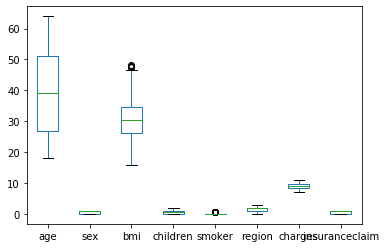

In [17]:
df_final.plot.box()

CORRELATION

In [18]:
df_final.corr()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.019041,0.118887,0.048791,-0.023820,0.002974,0.528767,0.115755
sex,-0.019041,1.000000,0.037031,0.017587,0.076096,0.003293,0.006885,0.029141
bmi,0.118887,0.037031,1.000000,0.020773,0.002264,0.155877,0.139890,0.382725
children,0.048791,0.017587,0.020773,1.000000,0.012269,0.014293,0.170973,-0.424673
smoker,-0.023820,0.076096,0.002264,0.012269,1.000000,-0.002333,0.665345,0.333914
region,0.002974,0.003293,0.155877,0.014293,-0.002333,1.000000,-0.042320,0.019811
charges,0.528767,0.006885,0.139890,0.170973,0.665345,-0.042320,1.000000,0.234488
insuranceclaim,0.115755,0.029141,0.382725,-0.424673,0.333914,0.019811,0.234488,1.000000


PAIRPLOT

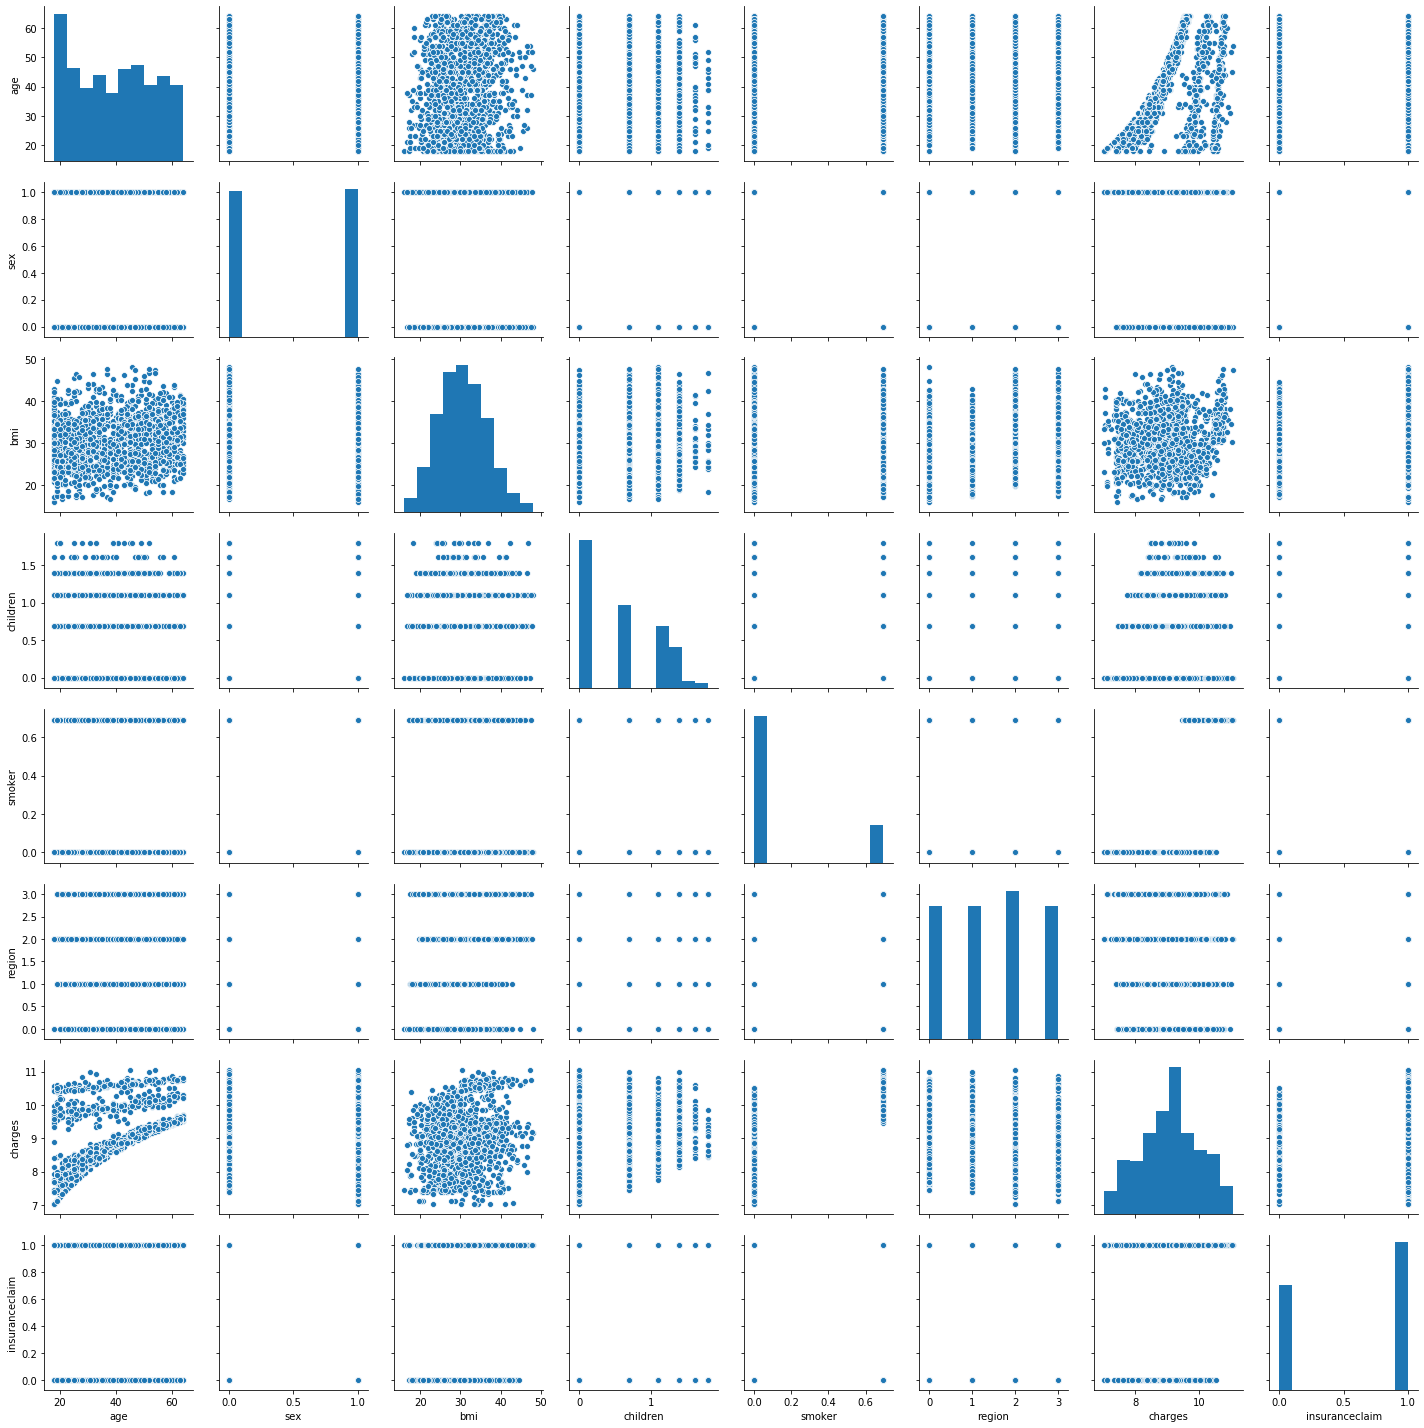

In [19]:
sns.pairplot(df_final)

# TRAIN AND TEST DATA

In [20]:
df_x=df_final.iloc[:,:-1]
print(df_x)
y=df_final.iloc[:,-1]
print(y)
print()
print(df_x.shape)
print(y.shape)

      age  sex     bmi  children    smoker  region    charges
0      19    0  27.900  0.000000  0.693147       3   9.734236
1      18    1  33.770  0.693147  0.000000       2   7.453882
2      28    1  33.000  1.386294  0.000000       2   8.400763
3      33    1  22.705  0.000000  0.000000       1   9.998137
4      32    1  28.880  0.000000  0.000000       1   8.260455
...   ...  ...     ...       ...       ...     ...        ...
1333   50    1  30.970  1.386294  0.000000       1   9.268755
1334   18    0  31.920  0.000000  0.000000       0   7.699381
1335   18    0  36.850  0.000000  0.000000       2   7.396847
1336   21    0  25.800  0.000000  0.000000       3   7.605365
1337   61    0  29.070  0.000000  0.693147       1  10.279948

[1334 rows x 7 columns]
0       1
1       1
2       0
3       0
4       1
       ..
1333    0
1334    1
1335    1
1336    0
1337    1
Name: insuranceclaim, Length: 1334, dtype: int64

(1334, 7)
(1334,)


In [21]:
x=df_x

# TRAINING AND TESTING - VARIOUS MODELS

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=10,stratify=y)

In [23]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(933, 7) (401, 7)
(933,) (401,)


CLASSIFIERS

In [24]:
knn=KNeighborsClassifier(n_neighbors=10)
sv=SVC()
dtc=DecisionTreeClassifier(random_state=10)
lr=LogisticRegression()
gnb=GaussianNB()
rfc=RandomForestClassifier()

In [25]:
models=[]
models.append(('KNeighborsClassifier',knn))
models.append(('SVC',sv))
models.append(('DecisionTreeClassifier',dtc))
models.append(('LogisticRegression',lr))
models.append(('GaussianNB',gnb))
models.append(('RandomForestClassifier',rfc))

FUNCTION DECLARATION

************* KNeighborsClassifier *************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')


Accuracy Score =  0.71571072319202


cross_val_score =  0.7436397132587234


roc_auc_score =  0.7144045242847639


classification_report
               precision    recall  f1-score   support

           0       0.64      0.71      0.67       167
           1       0.78      0.72      0.75       234

    accuracy                           0.72       401
   macro avg       0.71      0.71      0.71       401
weighted avg       0.72      0.72      0.72       401



[[118  49]
 [ 65 169]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



************* SVC *************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_sta

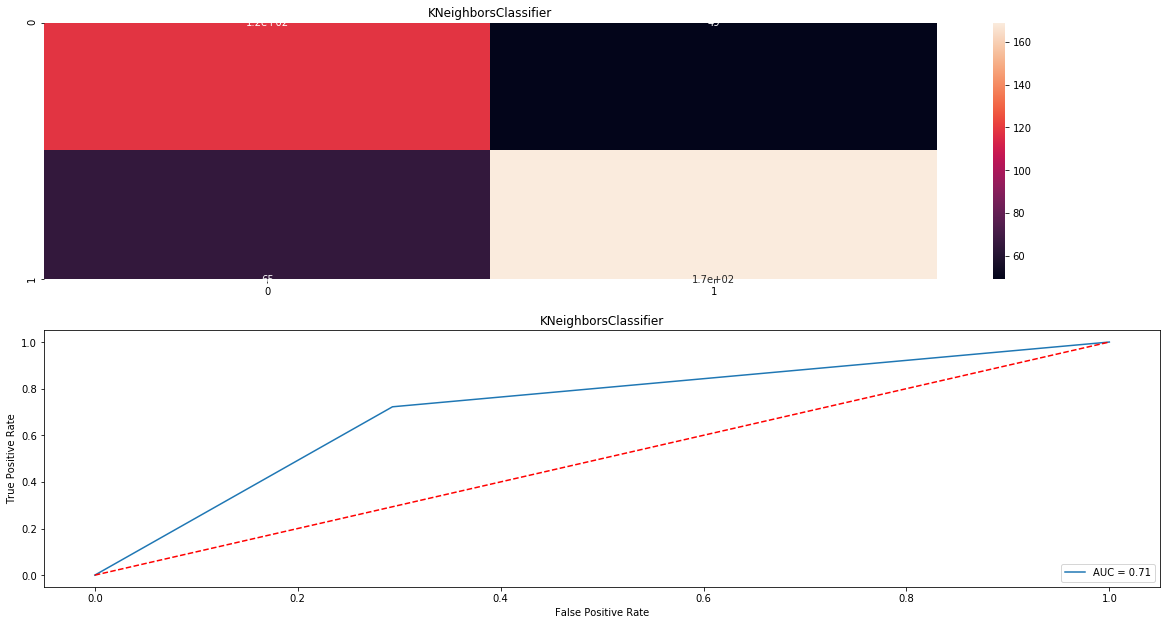

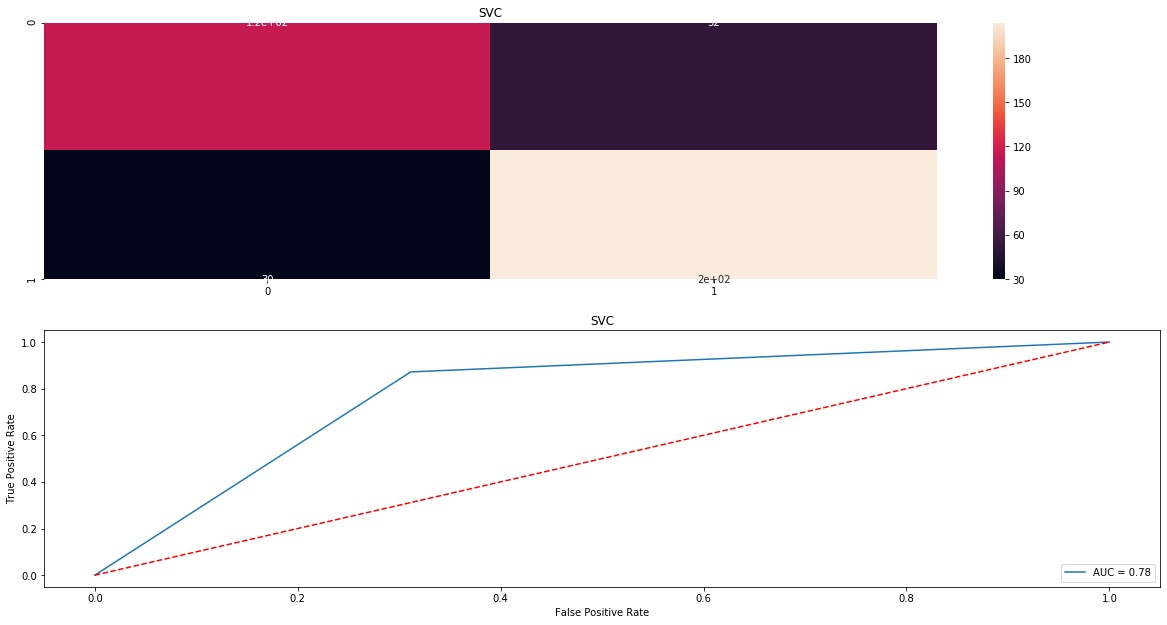

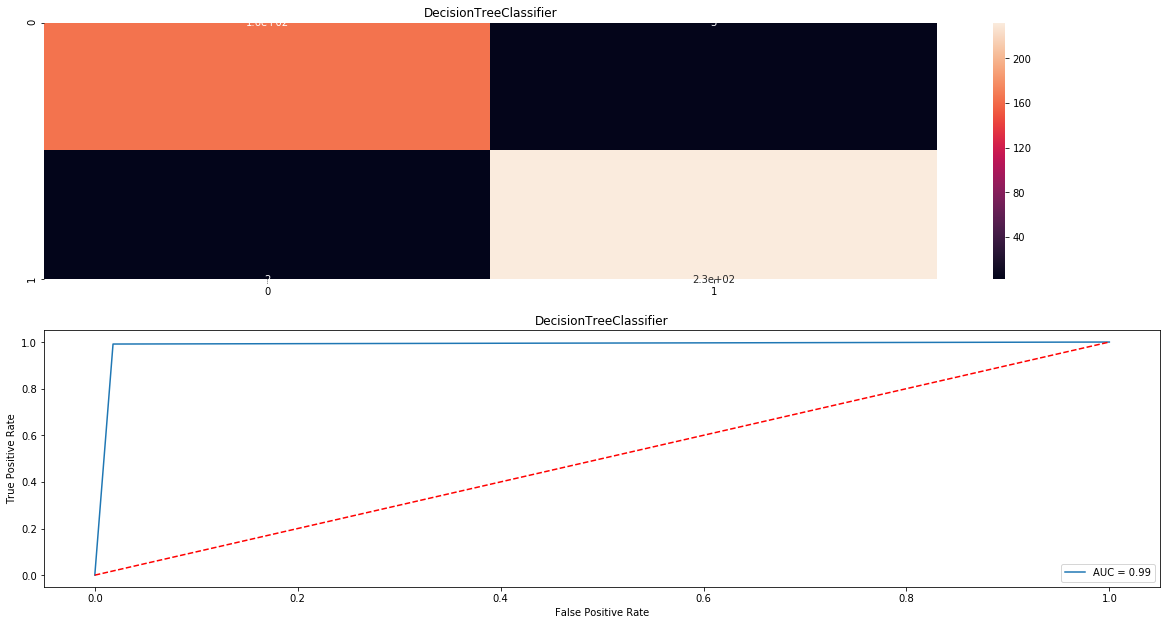

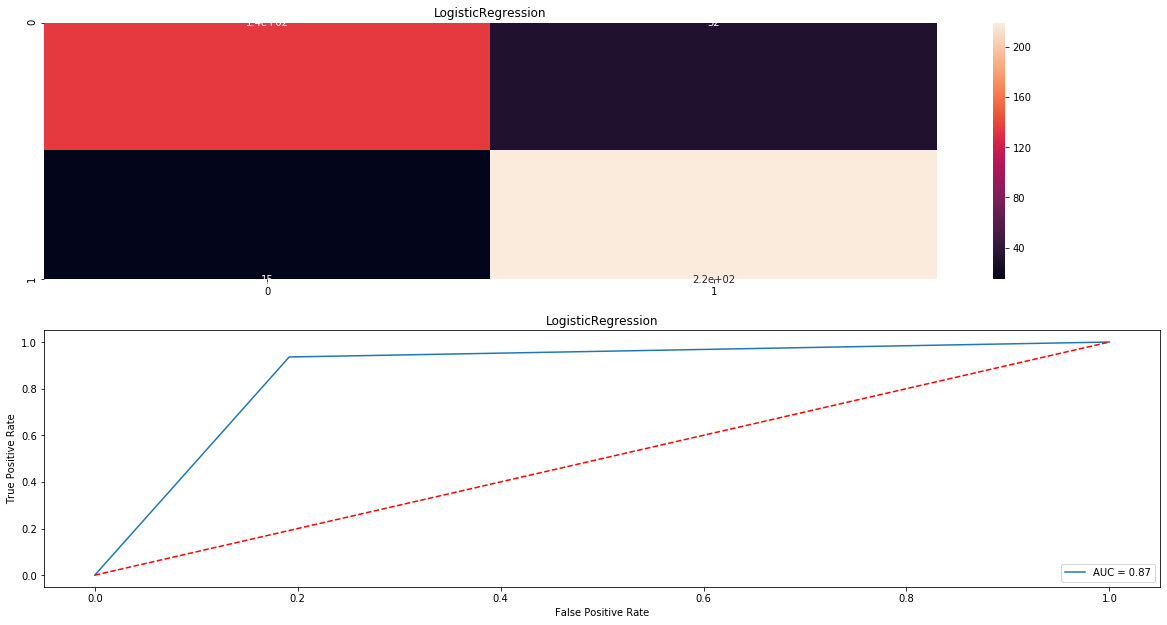

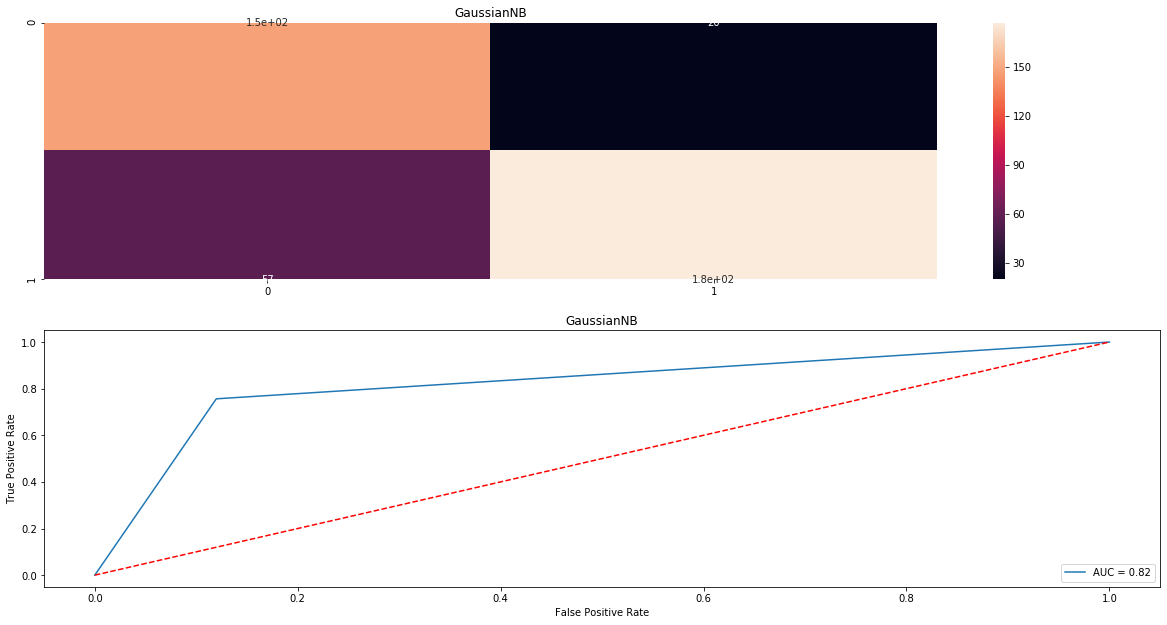

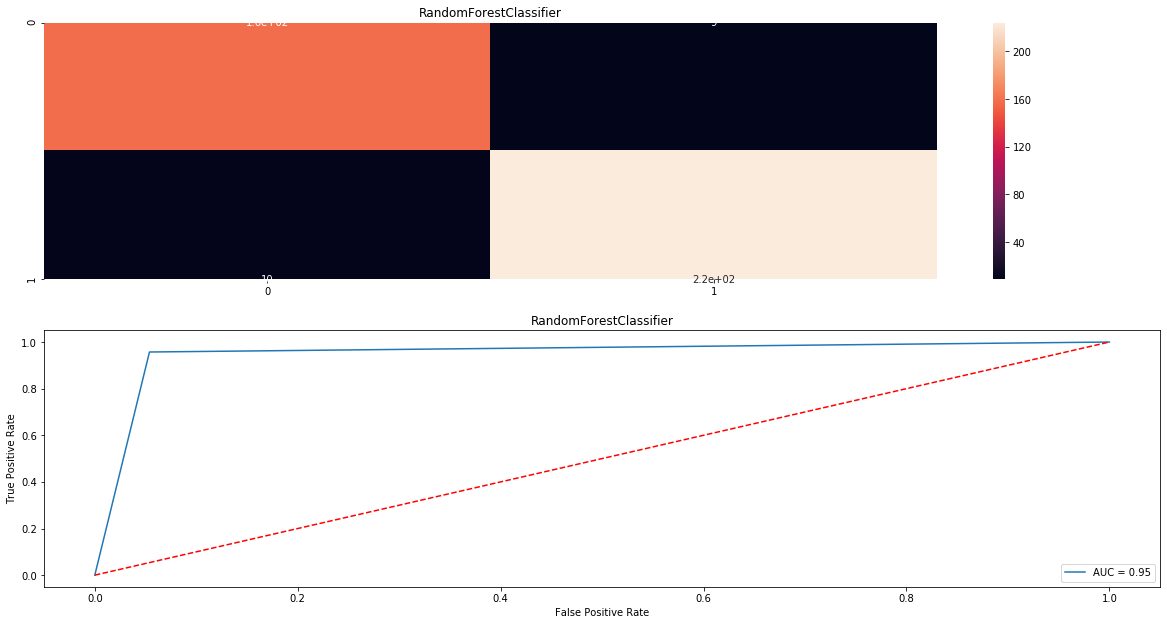

In [26]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('*************',name,'*************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    y_pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,y_pred)
    print('Accuracy Score = ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('cross_val_score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,y_pred))
    print('\n')
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    print('\n')
    plt.figure(figsize=(20,50))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

# BEST MODEL

In [27]:
result=pd.DataFrame({'Model ':Model,'Accuracy Score ':score,'Cross_Val_Score':cvs,'ROC_AUC_Curve':rocscore})
result

,Model,Accuracy Score,Cross_Val_Score,ROC_AUC_Curve
0,KNeighborsClassifier,71.571072,74.363971,71.440452
1,SVC,79.551122,82.538257,78.020881
2,DecisionTreeClassifier,98.753117,97.679834,98.674446
3,LogisticRegression,88.279302,86.429507,87.214033
4,GaussianNB,80.798005,79.385931,81.832489
5,RandomForestClassifier,95.261845,94.453433,95.168637


I choose Decision Tree Classifier for this dataset. 

Accuracy Score = 98.753117, Cross_Val_Score = 97.679834, ROC_AUC_Curve = 98.674446

# PICKLE

In [28]:
joblib.dump(dtc,"sli.pkl")

['sli.pkl']